# Study for Child Activity Center Small Business

This dataset explores data that was extracted from CRM app for a small business - activities of the business are as in the header

The dataset first removes all entries before April 2022 and after December 2022. This is to ensure that there is stability in input of information that properly captures the business when it is in its full operational state. As the CSV also initially included bookings made in January 2023 *(prebookings)* those were also removed to try as much as possible to only count bookings that actually had transacted.

After this was done, all entries that occured on Mondays were removed. This is due to the fact that on normal weeks, the business does not operate on Mondays and thus any entries that were recorded on a Monday should be taken as outliers and not counted to the data that gives a proper operational overview of the business. 

There were also entries that were made by the owner/operators of the business that caused dirtying of the data, and those were removed before the work was done to analyse the data that was remaining after all outliers/unclear entries were removed. 

While details of how the data was cleaned can be found in this file, for business insights the reader can scroll down and start reading from **Exploration of Customer Profiles**

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('makers.csv')
import matplotlib.pyplot as plt

In [2]:
cleaned_data = data[1:]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 1 to 5600
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Date                                                          5600 non-null   object 
 1   Time                                                          5600 non-null   object 
 2   Service                                                       5600 non-null   object 
 3   Service provider                                              5600 non-null   object 
 4   Code                                                          5600 non-null   object 
 5   Client name                                                   5268 non-null   object 
 6   Client email                                                  5268 non-null   object 
 7   Client phone                                                  5268 no

In [3]:
cleaned_data["Date"] = pd.to_datetime(cleaned_data["Date"], dayfirst = True)

/var/folders/pq/6k_969mj2vz2_1xd9b8z0wr00000gn/T/ipykernel_71059/1118333045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Date"] = pd.to_datetime(cleaned_data["Date"], dayfirst = True)


In [4]:
day_of_week_array = []
for datetime in cleaned_data["Date"]:
    day = datetime.dayofweek
    day_of_week_array.append(day)
    
day_map = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

cleaned_data["day_week"] = day_of_week_array
cleaned_data['day_week'] = cleaned_data['day_week'].map(day_map)

    

/var/folders/pq/6k_969mj2vz2_1xd9b8z0wr00000gn/T/ipykernel_71059/1486641209.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["day_week"] = day_of_week_array
/var/folders/pq/6k_969mj2vz2_1xd9b8z0wr00000gn/T/ipykernel_71059/1486641209.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['day_week'] = cleaned_data['day_week'].map(day_map)


In [5]:
cleaned_data = cleaned_data[(cleaned_data['Date'] >= "2022/4/1") & (cleaned_data['Date'] <= "2022/12/31")]

In [6]:
cleaned_data['Date'].unique()

array(['2022-12-31T00:00:00.000000000', '2022-12-24T00:00:00.000000000',
       '2022-12-23T00:00:00.000000000', '2022-12-22T00:00:00.000000000',
       '2022-12-21T00:00:00.000000000', '2022-12-20T00:00:00.000000000',
       '2022-12-18T00:00:00.000000000', '2022-12-17T00:00:00.000000000',
       '2022-12-16T00:00:00.000000000', '2022-12-15T00:00:00.000000000',
       '2022-12-14T00:00:00.000000000', '2022-12-13T00:00:00.000000000',
       '2022-12-11T00:00:00.000000000', '2022-12-10T00:00:00.000000000',
       '2022-12-09T00:00:00.000000000', '2022-12-08T00:00:00.000000000',
       '2022-12-07T00:00:00.000000000', '2022-12-06T00:00:00.000000000',
       '2022-12-04T00:00:00.000000000', '2022-12-02T00:00:00.000000000',
       '2022-12-01T00:00:00.000000000', '2022-11-30T00:00:00.000000000',
       '2022-11-29T00:00:00.000000000', '2022-11-27T00:00:00.000000000',
       '2022-11-26T00:00:00.000000000', '2022-11-25T00:00:00.000000000',
       '2022-11-24T00:00:00.000000000', '2022-11-23

At this point in the data cleaning, all entries that are before April and After December 2022 are removed. Now we need to move forward to remove all data entries that coincide with Monday, as Monday are outlier values that may skew the data (given that the shop is not open on all Mondays

In [7]:
cleaned_data = cleaned_data[cleaned_data['day_week'] != "Monday"]

In [8]:
cleaned_data['day_week'].value_counts()

Sunday       1276
Saturday     1145
Friday        832
Tuesday       666
Wednesday     551
Thursday      550
Name: day_week, dtype: int64

In [9]:
cleaned_data.shape

(5020, 34)

In [10]:
cleaned_data[(cleaned_data['Client name'] == "Amz") | \
            (cleaned_data["Client name"] == "Aisyah Zainalabidin")].shape

(215, 34)

Above, we have ascertained that Amz and Aisyah have entered a total of 215 entries out of 5020
. We need to remove these entries because these entries are unable to reflect the specific customer that they have entered these entries on behalf of, and also because these are done with superadmin rights they are able to book more than a 1 hour slot at a time so these might skew the results

In [11]:
cleaned_data = cleaned_data[(cleaned_data['Client name'] != "Amz") \
                           & (cleaned_data['Client name'] != "Aisyah Zainalabidin")]

In [12]:
cleaned_data.shape

(4805, 34)

Because **5020 - 215 = 4805** we can know ascertain that all entries by **Amz** and **Aisyah Zainaladbidin** have been removed. As the dataset also includes cancelled classes, we should be removing them from the dataset.

In [13]:
cleaned_data[cleaned_data['Is cancelled'] == "Yes"].shape

(903, 34)

In [14]:
cleaned_data = cleaned_data[cleaned_data['Is cancelled'] != "Yes"]
cleaned_data.shape

(3902, 34)

All remaining entries are now entries that are uncancelled and were carried out during the time of study.

# Exploration of Customer Profiles 

In [15]:
nan_bool = cleaned_data[cleaned_data['Client name'].isna()]
cleaned_data = cleaned_data[cleaned_data['Client name'].notna()]

Below we are ascertaining that there are no more **"NaN"** values under 'Client name' in our data set.

In [16]:
cleaned_data['Client name'].value_counts(dropna = False).describe()


count    449.000000
mean       8.654788
std       14.932997
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      120.000000
Name: Client name, dtype: float64

In [17]:
cleaned_data['Client name'].value_counts().describe()

count    449.000000
mean       8.654788
std       14.932997
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      120.000000
Name: Client name, dtype: float64

According to the cleaned dataset, 449 unique customers had sent their children to the facility between April and December 2022. 

From the months of April to December 2022, the average customer send their child to the facility 8.65 hours across 9 Months, translating to slightly less than 1 hour per month. There might be a few factors that are skewing the data 

* Since the business only started proper in April, it could be that the mean would start changing across months. We will look into this later 

* Outliers on the high end might be skewing the data, since the maximum count is 120 hours across the months of April to December 2022. 

We will now move to study 

* Top Customers across April to December
* Trends of unique customer counts across months, to ascertain whether unique customer count is growing

# Exploration of Top Customers


In [18]:
cleaned_data['Client name'].value_counts(normalize = True).sort_values(ascending = False).head(20)

Andrea Chong          0.030880
Kimberly Wong         0.029336
Melissa Burgess       0.021873
Jeffrey Francisco     0.021101
Shirlynn Lukey        0.020587
Selene Cheng          0.020329
Scarlet Li            0.019815
Amanda Rabot          0.017499
Laura Tromans         0.016984
Gabriella Oey         0.016212
Aude Giraud           0.014925
Lynn Soh              0.013639
Vivienne Tan          0.013381
Melissa-Anne Bheem    0.013124
Kah nan Khoo          0.011323
Petrina Soh           0.011065
Jamie Lu              0.010551
Jaime Zhong           0.010293
Celine Trinh          0.009779
adela yeo             0.009521
Name: Client name, dtype: float64

1291
3886


Text(0.5, 0, '')

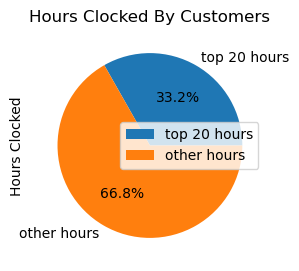

In [19]:
top_20 = cleaned_data['Client name'].value_counts().sort_values(ascending = False).head(20)
top_20_total = top_20.sum()
print(top_20_total)
total = cleaned_data['Client name'].value_counts()
total_hours = total.sum()
print(total_hours)

hours_dict = {
    'top 20 hours': 1291,
    'other hours' : 3886 - 1291
}

hours_pie = pd.DataFrame.from_dict(hours_dict, orient = 'index')
hours_pie = hours_pie.rename(columns = {0:'Hours Clocked'})
hours_pie.plot.pie(subplots = True, autopct='%1.1f%%', figsize = (3, 3))
plt.legend(loc = "right")
plt.title('Hours Clocked By Customers')
plt.xlabel('')


The top 20 customers from April to December 2022 are shown above. Of note, **Andrea Chong** - who has a certain amount of noteriety, has sent her child to the facility for 100 recorded hours from April to December. She and Kimberly Wong each make up approximately 3% of the billed hours during the time span of this study. 

**Possible Recommendations:**
* Exploration of working with Andrea to be an ambassador for the facility, perhaps doing something in kind on a Monday specifically for a party for her kid (or something along that line) in exchange for social media coverage
* Special thank you notes to the top (x) number of customers to be sent out or referral deals could be worked out with these parents who would definitely be great ambassadors for the facility

In [20]:
before_dec = cleaned_data[cleaned_data['Date'] < '2022/12/1']['Client name'].value_counts()
print(before_dec[before_dec == 1])

Jay                 1
Lim Hwee Ying       1
Jeanne Lim          1
Tan wan ting        1
Michael chui        1
                   ..
RFI Iskandar        1
Rachel Wu           1
Connie Lee          1
Sarah Ho            1
Alyzza Sarmiento    1
Name: Client name, Length: 131, dtype: int64


In [21]:
non_return = before_dec[before_dec == 1].index
december_customers = cleaned_data[cleaned_data['Date'] >= '2022/12/1']['Client name'].value_counts().index

In [22]:
non_return_list = []
for name in non_return:
    if name not in december_customers:
        non_return_list.append(name)
for name in non_return_list:
    print(name)
print("number of customers who did not return:", len(non_return_list))

Jay
Lim Hwee Ying
Jeanne Lim
Tan wan ting
Michael chui
Huilyung Lee
Michelle Tan
Sapna ganglani
Emilah
Jerline
Vanathi Eliora Ray
Audrey Gerard
Pan Ju Khuan
Denise Tan
KM TohKammui
Grace Ng
Joys Tan
Jialin
Steph
Lynn Han
Jiaying
NG KAI MING MELVIN
Cheryl Heng
Christabel Tan
Merdin Yeoh
Ann Loh
Koh Teik Ling
Lai
Sophia Koh
Jaclyn chow
Angie Lim
Keh Hong Wei
Danielle
Varun Sajwan
Carol Chee
Sophia Ng
Bernice Zhang
Carmen Low
Peiwen Soh
Cheryl Lee
Shane Tan
Timothy
Evelyn Peng
Valerie Kuek
Marouen Zelleg
Amanda Björk
Audrey
Tan Wei Ling
Joachim Liu
Germaine
Kush
SYIKIN SHARIFF
Huang Xin
Pelecia
Phyllis
Ris Nurul
Sharon Lim
FOO WEE YEN
Zejun
Valerie
Paul Leong
Toby Henderson
Tze Lin Kwet
Joanna Tan
Daryl Boey
Diane NG
Elizabeth Quek
Emma
Sky Kang
Rouba Kouwatli
Tim c
Jo How
Coral Kee
Anastasia
Lily Phoa
Jazreel Lim
Xin Jie
Tan Weizhao
Zoey
Liz Khoo
Charlene Er
Shirley
Sephine Goh
Ming Xiu Koh
Venus Wong
Irena Pavlova
Chloe Dunn-Lee
Wendy How
jessica
Namirah Naser
Rhea Ong
CHEN YAHUEI
Chang

# Non-Returning Customers 
From customers who had sent their children to the facility between April and November 2022, there were 111 customers in total who did not return by December 2022, which means that conversion rate for the facility for first time customers is standing at about 80%

Certain possibilities could be contributing to this 

* Parents might be sending their children for initial trials, and for whatever reason, they might find that it's not for them
* Some of these customers could have come in the early days of the business, where business operations may not have been as smooth yet

**Possible Recommendations**
* Since customer data has email records, it is possible to reach out to these customers to find out why they did not return, and possibly convince them to give the facility another chance. While painful to deal with, knowing that you have customers who are not returning and communicating with them might be a good way to get client feedback as to why for these customers in their minds there is not a product market fit


* Not all feedback needs to be taken into consideration, but it should be heard as it's valuable market intel. For example, some people might find price point to be prohibitive, but if the facility has made a business decision that the economics of its business model requires a certain price point then it should stick by that. That being said, to not ask these customers and find out reasons would be to have the business willingly have a potential blind spot 

In [23]:
email_dictionary = {}


for name in non_return_list:
    if name not in email_dictionary:
        email_dictionary[name] = cleaned_data[cleaned_data['Client name'] == name] \
        ['Client email'].iloc[0]

email_df = pd.Series(email_dictionary)
email_df.head(111)

Jay               jasonbern.low@gmail.com
Lim Hwee Ying      lim.hweeying@gmail.com
Jeanne Lim           jeanne.lim@gmail.com
Tan wan ting     princesswt5@yahoo.com.sg
Michael chui     michaelcuica@hotmail.com
                           ...           
Fan Fan               funnizt@hotmail.com
Neo Xian Zhen         nxianzhen@gmail.com
Ankita Varma         avarma.sph@gmail.com
Idy Chan              chanbihui@gmail.com
Noemi Jimenez          noenoemi@gmail.com
Length: 111, dtype: object

In [24]:
email_df.to_csv('email_list.csv')

# Exploration of New Customer Growth

We can now move forward to tracking from month to month, how many have sent their children to the facility for the first time. Through this we hope to be able to find insights on whether the growth of customer base can be tied to either organic growth or specific marketing efforts that may have been undertaken prior to the period. Since April was the first month of operational business, we should be looking to the period of May to December to see how new customer growth is tracking from month to month.

In [25]:
tracked_client_names = []
new_client_dict = {}

april_clients = []

def get_new(after_date, before_date, month):
    month_names = []
    new_names = []
    for name in cleaned_data[(cleaned_data['Date'] < before_date) &\
                            (cleaned_data['Date'] >= after_date)]['Client name']:
                            
        month_names.append(name) #appends every name to the month total list
        if name not in tracked_client_names:
            new_names.append(name) #if it is not in tracked_client_names, append to new_names
            tracked_client_names.append(name)#after which appent to tracked_client names
    month_names = list(set(month_names))
    new_names = list(set(new_names))
    new_client_dict[month] = [len(month_names), len(new_names)]
get_new('2022/4/1', '2022/5/1', 'April')
get_new('2022/5/1', '2022/6/1', 'May')
get_new('2022/6/1', '2022/7/1', 'June')
get_new('2022/7/1', '2022/8/1', 'July')
get_new('2022/8/1', '2022/9/1', 'August')
get_new('2022/9/1', '2022/10/1', 'September')
get_new('2022/10/1', '2022/11/1', 'October')
get_new('2022/11/1', '2022/12/1', 'November')
get_new('2022/12/1', '2023/1/1/', 'December')

new_client_dict

{'April': [66, 66],
 'May': [104, 75],
 'June': [80, 28],
 'July': [119, 62],
 'August': [119, 49],
 'September': [146, 57],
 'October': [136, 34],
 'November': [131, 45],
 'December': [116, 33]}

In [26]:
new_clients = pd.DataFrame.from_dict(new_client_dict, orient = 'index')
new_clients

,0,1
April,66,66
May,104,75
June,80,28
July,119,62
August,119,49
September,146,57
October,136,34
November,131,45
December,116,33


In [27]:
new_clients = new_clients.rename(columns = {0:'Total Unique Customers', 1:'New Customers'})

In [28]:
new_clients

,Total Unique Customers,New Customers
April,66,66
May,104,75
June,80,28
July,119,62
August,119,49
September,146,57
October,136,34
November,131,45
December,116,33


In [29]:
len(list(set(tracked_client_names)))

449

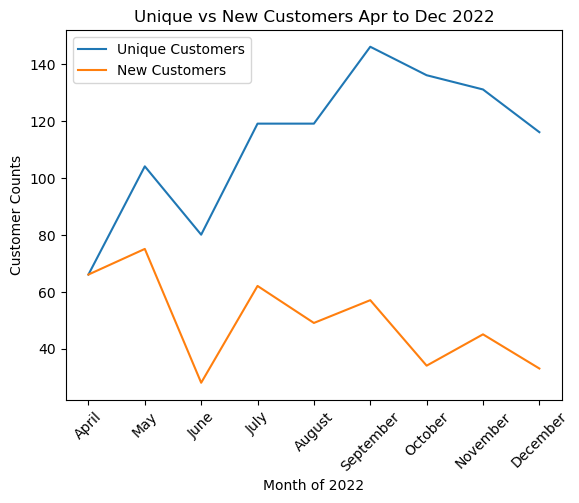

In [30]:

total = new_clients['Total Unique Customers']
new = new_clients['New Customers']

plt.plot(total, label = 'Unique Customers')
plt.plot(new, label = 'New Customers')
plt.title("Unique vs New Customers Apr to Dec 2022")
plt.ylabel("Customer Counts")
plt.xlabel("Month of 2022")
plt.legend()
plt.xticks(rotation = 45)
plt.show()

One key point of concern is that records show a continuing downtrend of new customers coming into the facility. While initial conversion rates of approx 80% are encouraging, in any business the consistent building of a pipeline of new customer leads is essential. 

We can also see that in terms of unique customers per month, the record of **143 unique customers** was reached in the month of **October 2022** . Certain things could be playing into this like seasonality, but the stats show that without a key focus on new customer generation it is very hard to grow the unique customer base and diversify risk/boost overall revenue in the long run.

From speaking to the principals, thus far because they key focus of the business has been on stabilizing operations, not that much focus has been put into marketing/lead generation. 

As the principals have also expressed that the facility is not yet operating an maximal operating capacity, the statistics show that for the year ahead a key focus of the business should be on the generating of new leads and focusing on conversion of those leads into repeat customers. 

# Analyzing Time / Date Data 
We now move forward to analyzing time/date data - specifically to find out the operational load at specific dates and times for the business. As there are times where the facility is closed off to the public, we would need to manage the data to make decisions on whether or not to include specific days in our computation of data as these times could potentially skew our analysis.

The information gathered from the principals of the facility can be found here 
https://docs.google.com/spreadsheets/d/1DXTy7xf05cVvdBH_bhmtlmI9PeCJFUptyL_vzPADh6w/edit?usp=sharing

The first step would be to convert all the Time data to integer values so that we can manage the data according to time as blocks of specific timings

In [31]:
import re
from datetime import datetime
time_list = []
for time in cleaned_data["Time"]:
    regex = "\d\d"
    timestring = re.findall(regex, time)[0]
    timestring = int(timestring)
    time_list.append(timestring)




    

In [32]:
cleaned_time = cleaned_data
cleaned_time['Time'] = time_list

We now have to move forward with making decisions on a day by day basis as to whether to include specific days in our dataset or not. Through line by line checks, we have found that for all dates of closures, no records have been found of public customers being booked in. So we now move on to workshops and private parties

|Date|	Day|	Time|	Type|
---|---|---|---|
|20-Sep-22|	Tuesday|	10:00 - 12:00|	Private Events|
|7-Jun-22|	Tuesday|	13:00 - 16:00|	Workshops| 
14-Jun-22|	Tuesday|	10: 00 - 14:00|	Workshops| 
21-Jun-22|	Tuesday|	13:00 - 16:00|	Workshops| 


The above table shows all tuesdays where there are anomalies in operations. 

* 20th September 2022 is a 2 hour event, so this should not skew numbers too much 

* We should be looking into 7th June 2022, 14th June 2022 and 21st June 2022

In [33]:
cleaned_time[cleaned_time['Date'] == '2022/6/14']

,Date,Time,Service,Service provider,Code,Client name,Client email,Client phone,Number of children?,Name(s) of Child(ren),...,Name and contact number of other authorised adult for pickup,Status,Price,Amount,Currency,Payment processor,Products for sale,Service Add-ons,Membership,day_week
4274,2022-06-14,15,Play Session (For Singles or Package holders),Play Session (For Singles or Package holders),3or122yn4,Julienne Tan,tan.julienne@gmail.com,6.598362e+09,1,Please list your minimaker's full name and da...,...,NaN,NaN,25,0.0,SGD,free,NaN,NaN,NaN,Tuesday
4275,2022-06-14,14,Play Session (For Singles or Package holders),Play Session (For Singles or Package holders),3or11vbft,Julienne Tan,tan.julienne@gmail.com,6.598362e+09,1,Please list your minimaker's full name and da...,...,NaN,NaN,25,0.0,SGD,free,NaN,NaN,NaN,Tuesday


As there are only 2 other entries on June 14th 2022 and the facility was closed for the majority of the day we should remove the whole day from the registry.

In [34]:
drop_index = cleaned_time[cleaned_time["Date"] == '2022/6/14'].index
cleaned_time.drop(drop_index, inplace=True)
cleaned_time[cleaned_time['Date'] == '2022/6/14']

,Date,Time,Service,Service provider,Code,Client name,Client email,Client phone,Number of children?,Name(s) of Child(ren),...,Name and contact number of other authorised adult for pickup,Status,Price,Amount,Currency,Payment processor,Products for sale,Service Add-ons,Membership,day_week


In [35]:
print('June 7th 2022')
print(cleaned_time[cleaned_time['Date'] == '2022/6/7'].shape)
print('June 21st 2022')
print(cleaned_time[cleaned_time['Date'] == '2022/6/21'].shape)

June 7th 2022
(9, 34)
June 21st 2022
(7, 34)


As there are 9 billed hours that were logged on June 7th 2022, we should keep this date in as removing the date would cause more error in the computation.

For June 21st 2022, even though the facility was closed for 3 hours, the facility was still operational for 5 hours. In these 5 hours, only 7 hours were billed. As such, we should keep this date.

In [36]:
print('Semptember 20th 2022')
print(cleaned_time[cleaned_time['Date'] == '2022/9/20'].shape)


Semptember 20th 2022
(4, 34)


We should keep September 20th as even though the facility was only closed for 2 hours, there were only 4 billed hours across the remaining 8 hours of operations

At this point of the data cleaning, we have accounted for and made decisions for all tuesdays in question

|Date|	Day|	Time|	Type|
|---|---|---|---
|4-May-22|	Wednesday|	14:00 - 16:00|	Workshops|
|11-May-22|	Wednesday|	14:00 - 16:00|	Workshops|
|18-May-22|	Wednesday|	14:00 - 16:00|	Workshops|
|25-May-22|	Wednesday|	14:00 - 16:00|	Workshops| 
|8-Jun-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|15-Jun-22|	Wednesday|	10: 00 - 14:00|	Workshops| 
|22-Jun-22|	Wednesday|	13:00 - 16:00	|Workshops| 
|6-Jul-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|13-Jul-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|20-Jul-22	|Wednesday|	13:00 - 16:00|	Workshops| 
|27-Jul-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|3-Aug-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|10-Aug-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|17-Aug-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|24-Aug-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|7-Sep-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|14-Sep-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|21-Sep-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|19-Oct-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|26-Oct-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|2-Nov-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|9-Nov-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|16-Nov-22|	Wednesday|	13:00 - 16:00|	Workshops| 
|23-Nov-22|	Wednesday|	13:00 - 16:00|	Workshops| 

A quick visual analysis of the data gathered from the principals reveals that for most wednesdays, the facility is closed off to the public. This has potential to skew the computation greatly if we are trying to compute operational load on a per hour basis. Depending on how the rest of the data shapes up, we will have to make a decision on how to deal with wednesdays

|Date|	Day|	Time|	Type|
|---|---|---|---|
|16-Jun-22|	Thursday|	10: 00 - 14:00|	Workshops |
|1-Dec-22|	Thursday|	10:00 - 12:00|	Workshops |

In [37]:
print('June 16th 2022')
print(cleaned_time[cleaned_time['Date'] == '2022/6/16'].shape)
print('December 1st 2022')
print(cleaned_time[cleaned_time['Date'] == '2022/12/1'].shape)

June 16th 2022
(8, 34)
December 1st 2022
(13, 34)


We should drop 16th June 2022, as the facility was closed for most operational hours. December 1st 2022 should be kept as the number of hours closed does not skew the dataset

In [38]:
drop_index = cleaned_time[cleaned_time['Date'] == '2022/6/16'].index
cleaned_time.drop(drop_index, inplace = True)
cleaned_time[cleaned_time['Date'] == '2022/6/16']


,Date,Time,Service,Service provider,Code,Client name,Client email,Client phone,Number of children?,Name(s) of Child(ren),...,Name and contact number of other authorised adult for pickup,Status,Price,Amount,Currency,Payment processor,Products for sale,Service Add-ons,Membership,day_week


|Date|	Day|	Time|	Type|
|---|---|---|---|
|8-Apr-22|	Friday|	16:00 - 18:00|	Private Events|
|7-Oct-22|	Friday|	10:00 - 18:00|	Private Events|
|6-May-22|	Friday|	14:00 - 16:00|	Workshops |
|13-May-22|	Friday|	14:00 - 16:00|	Workshops |
|20-May-22|	Friday|	14:00 - 16:00|	Workshops |
|27-May-22|	Friday|	14:00 - 16:00|	Workshops |
|10-Jun-22|	Friday|	13:00 - 16:00|	Workshops |
|17-Jun-22|	Friday|	10: 00 - 14:00|	Workshops |
|24-Jun-22|	Friday|	13:00 - 16:00|	Workshops |
|2-Dec-22|	Friday|	10:00 - 12:00|	Workshops |
|2-Dec-22|	Friday|	15:00 - 18:00|	Workshops |

In [39]:
date_list = ['2022/4/8', '2022/10/7', '2022/5/6', '2022/5/13',
            '2022/5/20', '2022/5/27', '2022/6/10', '2022/6/17',
            '2022/6/24', '2022/12/2']
for date in date_list:
    print(date)
    print(cleaned_time[cleaned_time['Date'] == date].shape)

2022/4/8
(3, 34)
2022/10/7
(0, 34)
2022/5/6
(9, 34)
2022/5/13
(8, 34)
2022/5/20
(13, 34)
2022/5/27
(8, 34)
2022/6/10
(9, 34)
2022/6/17
(20, 34)
2022/6/24
(15, 34)
2022/12/2
(12, 34)


Of all Fridays, we should drop 8th of April 2022. This was at the beginning of the business, and the number of hours logged is inconseqeuntial.

In [40]:
drop_index = cleaned_time[cleaned_time['Date'] == '2022/4/8'].index
cleaned_time.drop(drop_index, inplace = True)
cleaned_time[cleaned_time['Date'] == '2022/4/8']

,Date,Time,Service,Service provider,Code,Client name,Client email,Client phone,Number of children?,Name(s) of Child(ren),...,Name and contact number of other authorised adult for pickup,Status,Price,Amount,Currency,Payment processor,Products for sale,Service Add-ons,Membership,day_week


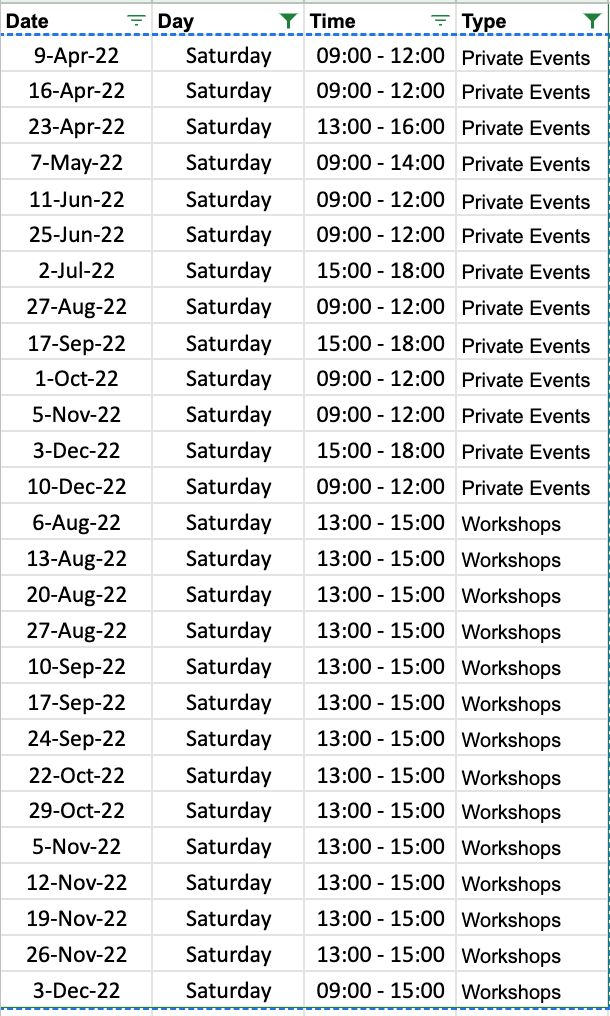

In [41]:
date_list = ['2022/4/9', '2022/4/16', '2022/4/23',
            '2022/5/7',
            '2022/6/11', '2022/6/25',
            '2022/7/2', '2022/8/27',
            '2022/9/17', '2022/10/1',
            '2022/11/5', 
            '2022/12/3', '2022/12/10',
            '2022/8/6', '2022/8/13', '2022/8/20', '2022/8/27',
            '2022/9/10', '2022/9/17', '2022/9/24',
            '2022/10/22', '2022/10/29',
            '2022/11/5', '2022/11/12', '2022/11/19', '2022/11/26',
            '2022/12/3']

for date in date_list:
    print(date, ':', cleaned_time[cleaned_time['Date'] == date].shape)

2022/4/9 : (7, 34)
2022/4/16 : (4, 34)
2022/4/23 : (14, 34)
2022/5/7 : (11, 34)
2022/6/11 : (11, 34)
2022/6/25 : (21, 34)
2022/7/2 : (14, 34)
2022/8/27 : (17, 34)
2022/9/17 : (26, 34)
2022/10/1 : (32, 34)
2022/11/5 : (7, 34)
2022/12/3 : (0, 34)
2022/12/10 : (30, 34)
2022/8/6 : (21, 34)
2022/8/13 : (37, 34)
2022/8/20 : (27, 34)
2022/8/27 : (17, 34)
2022/9/10 : (28, 34)
2022/9/17 : (26, 34)
2022/9/24 : (23, 34)
2022/10/22 : (31, 34)
2022/10/29 : (21, 34)
2022/11/5 : (7, 34)
2022/11/12 : (32, 34)
2022/11/19 : (24, 34)
2022/11/26 : (36, 34)
2022/12/3 : (0, 34)


Dates to drop :
* 2022/4/9 - beginning of business AND private event, non essential date
* 2022/4/16 - beginning of business AND private event, non essential date
* 2022/11/5 - facility was essentially closed for whole day
* 2022/12/3 - facility was essentially closed for whole day 


In [42]:
drop_list = ['2022/4/9', '2022/4/16', '2022/11/5', '2022/12/3']
for date in drop_list:
    drop_index = cleaned_time[cleaned_time['Date'] == date].index
    cleaned_time.drop(drop_index, inplace = True)
date_list = drop_list
for date in date_list:
    print(date, ':', cleaned_time[cleaned_time['Date'] == date].shape)

2022/4/9 : (0, 34)
2022/4/16 : (0, 34)
2022/11/5 : (0, 34)
2022/12/3 : (0, 34)


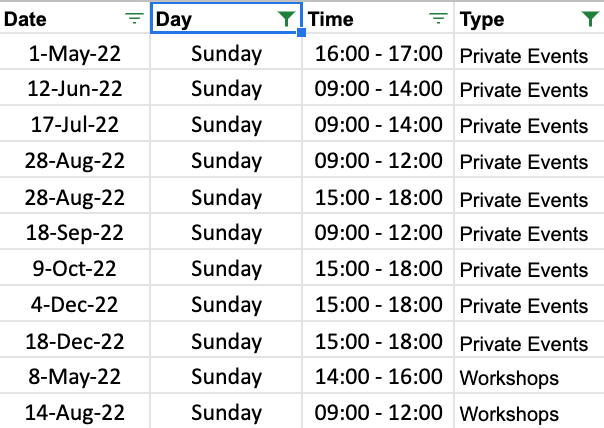

In [43]:
date_list = ['2022/5/1',
            '2022/6/12',
            '2022/7/17',
            '2022/8/28',
            '2022/9/18',
            '2022/10/9',
            '2022/12/4',
            '2022/12/18',
            '2022/5/8',
            '2022/8/14']

for date in date_list:
    print(date, ':', cleaned_time[cleaned_time['Date'] == date].shape)

2022/5/1 : (25, 34)
2022/6/12 : (5, 34)
2022/7/17 : (19, 34)
2022/8/28 : (5, 34)
2022/9/18 : (42, 34)
2022/10/9 : (17, 34)
2022/12/4 : (41, 34)
2022/12/18 : (21, 34)
2022/5/8 : (9, 34)
2022/8/14 : (25, 34)


Dates to drop :
* 2022/6/12 - facility was closed off to public for essentially whole day
* 2022/8/28 - facility was closed off to public for essentially whole day 
* 2022/5/8 - still early in the business and facility was closed off in the afternoon

In [44]:
drop_list = ['2022/6/12', '2022/8/28', '2022/5/8']
for date in drop_list:
    drop_index = cleaned_time[cleaned_time['Date'] == date].index
    cleaned_time.drop(drop_index, inplace = True)
date_list = drop_list
for date in date_list:
    print(date, ':', cleaned_time[cleaned_time['Date'] == date].shape)

2022/6/12 : (0, 34)
2022/8/28 : (0, 34)
2022/5/8 : (0, 34)


In [45]:

date_list = ['2022/5/5', '2022/6/28', '2022/6/29', '2022/6/30',
            '2022/7/26', '2022/9/27', '2022/9/28', '2022/9/29',
            '2022/9/30', '2022/10/5', '2022/10/11', '2022/10/12',
            '2022/10/13', '2022/10/14', '2022/12/24', '2022/12/27',
            '2022/12/28', '2022/12/29', '2022/12/30']
for date in date_list:
    print(date)
    print(cleaned_time[cleaned_time['Date'] == date].shape)

2022/5/5
(0, 34)
2022/6/28
(0, 34)
2022/6/29
(0, 34)
2022/6/30
(0, 34)
2022/7/26
(2, 34)
2022/9/27
(0, 34)
2022/9/28
(0, 34)
2022/9/29
(0, 34)
2022/9/30
(0, 34)
2022/10/5
(0, 34)
2022/10/11
(0, 34)
2022/10/12
(0, 34)
2022/10/13
(0, 34)
2022/10/14
(0, 34)
2022/12/24
(27, 34)
2022/12/27
(0, 34)
2022/12/28
(0, 34)
2022/12/29
(0, 34)
2022/12/30
(0, 34)


In [46]:
cleaned_data[cleaned_data['Date'] == '2022/7/26']

,Date,Time,Service,Service provider,Code,Client name,Client email,Client phone,Number of children?,Name(s) of Child(ren),...,Name and contact number of other authorised adult for pickup,Status,Price,Amount,Currency,Payment processor,Products for sale,Service Add-ons,Membership,day_week
3562,2022-07-26,10,Play Session (For Singles or Package holders),Play Session (For Singles or Package holders),3or1lsw3c,Daynor Storrier,daynor@wearelabel.com,6.581630e+09,2,Please list your minimaker's full name and da...,...,Daynor,NaN,25,50.0,SGD,stripe,NaN,NaN,NaN,Tuesday
3563,2022-07-26,10,Play Session (For Singles or Package holders),Play Session (For Singles or Package holders),3or1lt544,Daynor Storrier,daynor@wearelabel.com,6.581630e+09,2,Please list your minimaker's full name and da...,...,Daynor,NaN,25,50.0,SGD,stripe,NaN,NaN,NaN,Tuesday


Looking through all the closure dates, most are accurate except for the 26th of July 2022, where there were still records that were entered even though they were cancelled. we should drop this date

24th of December 2022 should be kept as the number of hours entered would is a considerable amount and removing the day would skew the index

In [47]:
drop_index = cleaned_time[cleaned_time['Date'] == '2022/7/26'].index
cleaned_time.drop(drop_index, inplace = True)

In [48]:
cleaned_time[cleaned_time['Date'] == '2022/7/26']

,Date,Time,Service,Service provider,Code,Client name,Client email,Client phone,Number of children?,Name(s) of Child(ren),...,Name and contact number of other authorised adult for pickup,Status,Price,Amount,Currency,Payment processor,Products for sale,Service Add-ons,Membership,day_week


At this point in the data cleaning procedure, we have removed days that could potentially skew high level overview data for tracking of busiest days in the week. We now move to trying to get a high level overview of customers per day, across April to December after removing outlier days.

Tuesday :  476 33
Wednesday :  439 33
Thursday :  424 32
Friday :  654 34
Saturday :  847 36
Sunday :  994 35
{'Tuesday': 14.42, 'Wednesday': 13.3, 'Thursday': 13.25, 'Friday': 19.24, 'Saturday': 23.53, 'Sunday': 28.4}


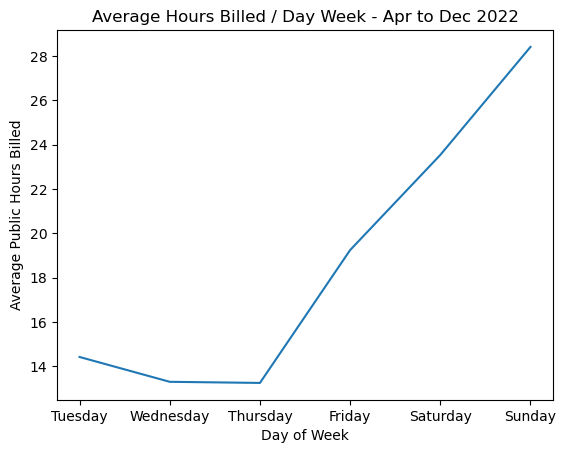

In [81]:
day_dict = {}
days = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days:
    dict_key = day
    hours_tracked = len(cleaned_time[cleaned_time['day_week'] == day])
    days_occured = len(cleaned_time[cleaned_time['day_week'] == day]['Date'].unique())
    print(day, ': ', hours_tracked, days_occured)
    day_dict[dict_key] = round(hours_tracked / days_occured, 2)

print(day_dict)
day_hours = pd.Series(day_dict)
plt.plot(day_hours)
plt.title('Average Hours Billed / Day Week - Apr to Dec 2022')
plt.xlabel('Day of Week')
plt.ylabel('Average Public Hours Billed')
plt.show()

Above is the high level overview of hours billed per week across April to December 2022 after stripping out all gross outlier days

It is noted that many of the facility's private activities happen on Wednesday, so we now look to see how removing all days that had private activities from the dataset relating to wednesday affects total hours billed per wednesday

In [65]:
wednesday_data = cleaned_time[cleaned_time['day_week'] == 'Wednesday']

wed_drop_list = ['2022/5/4', '2022/5/11', '2022/5/18', '2022/5/25',
                '2022/6/8', '2022/6/15', '2022/6/22',
                '2022/7/6', '2022/7/13', '2022/7/20', '2022/7/27',
                '2022/8/3', '2022/8/10', '2022/8/17', '2022/8/24',
                '2022/9/7', '2022/9/14', '2022/9/21',
                '2022/10/19', '2022/10/26',
                '2022/11/2', '2022/11/9', '2022/11/16', '2022/11/23']

for date in wed_drop_list:
    drop_index = wednesday_data[wednesday_data['Date'] == date].index
    wednesday_data.drop(drop_index, inplace = True)
                        
unique_wed = wednesday_data['Date'].unique()
avr_wed = len(wednesday_data) / len(unique_wed)
print(avr_wed)
print(len(unique_wed))



17.0
9


/var/folders/pq/6k_969mj2vz2_1xd9b8z0wr00000gn/T/ipykernel_71059/2970597633.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wednesday_data.drop(drop_index, inplace = True)


We find that this raises the average hours billed on Wednesdays from 13.3 hours per wednesday to 17 hours per wednesday, not moving the needle by much 

Tuesday :  238 14
Wednesday :  226 13
Thursday :  257 15
Friday :  365 14
Saturday :  467 16
Sunday :  575 16
{'Tuesday': 17.0, 'Wednesday': 17.38, 'Thursday': 17.13, 'Friday': 26.07, 'Saturday': 29.19, 'Sunday': 35.94}


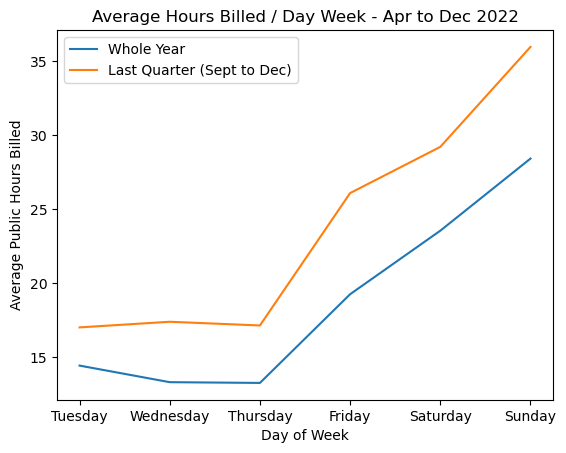

In [143]:
second_quarter = cleaned_time[cleaned_time['Date'] >= '2022/9/1']
second_quarter_day_dict = {}

for day in days:
    dict_key = day
    hours_tracked = len(second_quarter[second_quarter['day_week'] == day])
    days_occured = len(second_quarter[second_quarter['day_week'] == day]['Date'].unique())
    print(day, ': ', hours_tracked, days_occured)
    second_quarter_day_dict[dict_key] = round(hours_tracked / days_occured, 2)
print(second_quarter_day_dict)

second_quarter_series = pd.Series(second_quarter_day_dict)

plt.plot(day_hours, label = "Whole Year")
plt.plot(second_quarter_series, label = "Last Quarter (Sept to Dec)")
plt.title('Average Hours Billed / Day Week - Apr to Dec 2022')
plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Average Public Hours Billed')
plt.show()


From tracking the Average Public Hours billed per day, we see that the business is improving and stabilising in the last 3 months of 2022 as compared to the total average. As such, we will use the last three months to study what the occupancy trends are like for weekdays and weekends.

For this study we will again strip out all days where there were private activities which might skew the computation of data

In [98]:
second_quarter_weekends = second_quarter[(second_quarter['day_week'] == 'Saturday') | \
                                        (second_quarter['day_week'] == 'Sunday')]
drop_list = ['2022/9/17','2022/10/1',
                 '2022/11/5',
                 '2022/12/3',
                 '2022/12/10',
                 '2022/9/10', '2022/9/17', '2022/9/24',
                 '2022/10/22', '2022/10/29',
                 '2022/11/5', '2022/11/12', '2022/11/19', '2022/11/26',
                 '2022/12/3',
                 '2022/9/18, 2022/12/4', '2022/12/18']

for date in drop_list:
    drop_index = second_quarter_weekends[second_quarter_weekends['Date'] == date].index
    second_quarter_weekends.drop(drop_index, inplace = True)
    
second_quarter_weekends['Date'].unique()

/var/folders/pq/6k_969mj2vz2_1xd9b8z0wr00000gn/T/ipykernel_71059/2486044524.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_quarter_weekends.drop(drop_index, inplace = True)


array(['2022-12-31T00:00:00.000000000', '2022-12-24T00:00:00.000000000',
       '2022-12-17T00:00:00.000000000', '2022-12-11T00:00:00.000000000',
       '2022-12-04T00:00:00.000000000', '2022-11-27T00:00:00.000000000',
       '2022-11-20T00:00:00.000000000', '2022-11-13T00:00:00.000000000',
       '2022-11-06T00:00:00.000000000', '2022-10-30T00:00:00.000000000',
       '2022-10-23T00:00:00.000000000', '2022-10-16T00:00:00.000000000',
       '2022-10-15T00:00:00.000000000', '2022-10-09T00:00:00.000000000',
       '2022-10-08T00:00:00.000000000', '2022-10-02T00:00:00.000000000',
       '2022-09-25T00:00:00.000000000', '2022-09-18T00:00:00.000000000',
       '2022-09-11T00:00:00.000000000', '2022-09-04T00:00:00.000000000',
       '2022-09-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [137]:
second_quarter_weekdays = second_quarter[(second_quarter['day_week'] != 'Saturday') & \
                                        (second_quarter['day_week'] != 'Sunday')]

drop_list = ['2022/9/20', 
             #tuesdays
            '2022/9/7',
            '2022/9/14',
            '2022/9/21',
            '2022/10/19', '2022/10/26', 
             '2022/11/2', '2022/11/9', '2022/11/16', '2022/11/23',
             #wednesdays
             '2022/12/1',
             #thursdays
             '2022/10/7',
             '2022/12/2'
            ]

for date in drop_list: 
    drop_index = second_quarter_weekdays[second_quarter_weekdays['Date'] == date].index
    second_quarter_weekdays.drop(drop_index, inplace = True)

wkday_hr_dict = {}
hours_array = second_quarter_weekdays['Time'].unique()
for hour in hours_array:
    hour_logged = len(second_quarter_weekdays[second_quarter_weekdays['Time'] == hour])
    days_divided = len(second_quarter_weekdays['Date'].unique())
    wkday_hr_dict[hour] = round(hour_logged/days_divided, 2)
    
wkday_hr_dict[12] = 0.0
wkday_series = pd.Series(wkday_hr_dict)
wkday_series = wkday_series.sort_index()
index_ = ['9am', '10am', '11am', '12noon',
         '1pm', '2pm', '3pm', '4pm', '5pm']
wkday_series.index = index_
wkday_series



/var/folders/pq/6k_969mj2vz2_1xd9b8z0wr00000gn/T/ipykernel_71059/3179999568.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_quarter_weekdays.drop(drop_index, inplace = True)


9am       0.07
10am      5.36
11am      4.25
12noon    0.00
1pm       0.93
2pm       2.61
3pm       3.23
4pm       3.25
5pm       1.80
dtype: float64

9am       3.62
10am      6.76
11am      5.10
12noon    0.10
1pm       2.29
2pm       3.57
3pm       4.43
4pm       5.52
5pm       3.76
dtype: float64


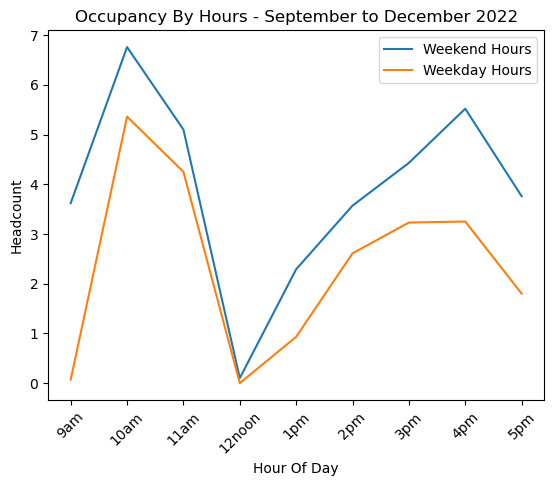

In [145]:
wkend_hr_dict = {}
hours_array = second_quarter_weekends['Time'].unique()
for hour in hours_array:
    hour_logged = len(second_quarter_weekends[second_quarter_weekends['Time'] == hour])
    days_divided = len(second_quarter_weekends['Date'].unique())
    wkend_hr_dict[hour] = round(hour_logged/days_divided, 2)

wkend_series = pd.Series(wkend_hr_dict)
wkend_series = wkend_series.sort_index()
index_ = ['9am', '10am', '11am', '12noon',
         '1pm', '2pm', '3pm', '4pm', '5pm']
wkend_series.index = index_
print(wkend_series)
plt.plot(wkend_series, label = "Weekend Hours")
plt.plot(wkday_series, label = "Weekday Hours")
plt.title('Occupancy By Hours - September to December 2022')
plt.ylabel('Headcount')
plt.legend()
plt.xlabel('Hour Of Day')
plt.xticks(rotation = 45)
plt.show()

We can see that the average trend of occupancy per hour has a similar shape for both weekend and weekdays - with the absolute numbers for weekend hours being higher. 

# Studying The Effects of Seasonality

minus_april = cleaned_time[(cleaned_time['Date'] >= '2022/5/2') & \
                          (cleaned_time['Date'] <= '2022/12/25')]
june_hols = minus_april[(minus_april['Date'] >= '2022/5/30') & \
                        (minus_april['Date'] <= '2022/6/26')]
june_hols.name = 'June Hols'
june_drop = june_hols.index
sept_hols = minus_april[(minus_april['Date'] >= '2022/9/5') & \
                        (minus_april['Date'] <= '2022/9/11')]
sept_hols.name = 'Sept Hols'
sept_drop = sept_hols.index
dec_hols = minus_april[(minus_april['Date'] >= '2022/11/21') & \
                      (minus_april['Date'] <= '2022/11/25')]
dec_hols.name = 'Dec Hols'
dec_drop = dec_hols.index


drop_list = [june_drop, sept_drop, dec_drop]
for drop in drop_list:
    minus_april.drop(drop, inplace = True)

normal_days = minus_april
normal_days.name = 'Normal Days'
    
avg_per_day_dict = {}

compute_list = [normal_days, june_hols, sept_hols, dec_hols]

hours_logged_normal = len(normal_days)
days_normal = len(normal_days['Date'].unique())
normal_days_average = hours_logged_normal / days_normal

for entry in compute_list:
    hours_logged = len(entry)
    days_logged = len(entry['Date'].unique())
    average = hours_logged / days_logged
    perc_float = (average - normal_days_average) / normal_days_average
    avg_per_day_dict[entry.name] = [round(average, 2), \
                                    "{:.2%}".format(perc_float)]

avg_data = pd.DataFrame.from_dict(avg_per_day_dict, orient = 'index')
avg_data.rename(columns = {0 : 'Average Days', 1: '% Different From Normal'}, inplace = True)

avg_data

We find as compared to normal days, we saw a -**25.34%** decrease in the June Holiday period and a **-6.96%** decrease in the September Holiday period. 

However, during the December Holiday period we saw a **10.44%** increase as compared to normal days. 


💡 It might be possible that at this stage in the business, we don’t have enough data to really ascertain how seasonality affects the volume of billable hours


What is encouraging is that we see that as the business has matured over the year, seasonality has less of a dampening effect on business volumes. 

It is possible that as compared to normal days, the December Holiday period increase does not represent an actual effect of seasonality, but rather the business maturing and average billable hours growing as compared to earlier periods of the year.